In [2]:
%load_ext autoreload
%autoreload 2
from cp_SAT import solve_OrTools
from utils import get_tsp_files_available, print_solution, get_positions, check_best_solution_length, find_solution
import logging as log
import tsplib95
from math import inf
from fourmil import ACO

# Approche complète

In [79]:
print("start")
solvers = {
    "complete" : solve_OrTools,
    "incomplet" : ACO
}
for tsp_instance in get_tsp_files_available("TSP_Instances/", 1) :
    log.info(tsp_instance)
    find_solution(tsp_instance, solvers)

start
2023-12-01 15:52:11 INFO     burma14.tsp


AttributeError: 'list' object has no attribute 'items'

1.0 -2.0
(320, 320) (330, 600)
(array([322.11450824, 319.86399628]), array([332.11450824, 599.86399628]))
1.0 -1.0
(320, 320) (330, 600)
(array([321.05725412, 319.93199814]), array([331.05725412, 599.93199814]))
1.0 0.0
(320, 320) (330, 600)
(array([320., 320.]), array([330., 600.]))
1.0 1.0
(320, 320) (330, 600)
(array([318.94274588, 320.06800186]), array([328.94274588, 600.06800186]))
1.0 2.0
(320, 320) (330, 600)
(array([317.88549176, 320.13600372]), array([327.88549176, 600.13600372]))


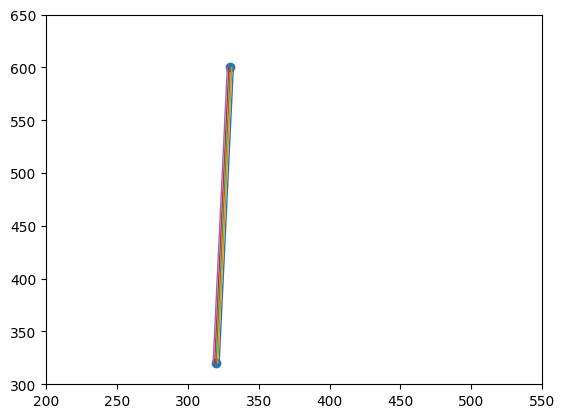

In [52]:
from utils import plot_offset_lines
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
plt.xlim(200,550)
plt.ylim(300,650)
plt.scatter(*zip(*[(320,320), (330, 600)]))
n= 5
for i in range(n):
    plot_offset_lines(ax,[(320,320), (330, 600)], n, i)

# Fourmil

start
2023-11-30 15:41:45 INFO     burma14.tsp


[autoreload of utils failed: Traceback (most recent call last):
  File "/Users/timothebonhoure/miniconda3/envs/resolution_probleme/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/timothebonhoure/miniconda3/envs/resolution_probleme/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/Users/timothebonhoure/miniconda3/envs/resolution_probleme/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/timothebonhoure/Docu

[(22.0, 21.52, 20.47, 19.41, 14.05, 16.3, 16.53, 17.2, 16.47, 16.47, 20.09, 20.09, 22.39, 25.23, 22.0), (96.05, 95.59, 97.02, 97.13, 98.12, 97.38, 97.38, 96.29, 96.1, 94.44, 94.55, 92.54, 93.37, 97.24, 96.05)]


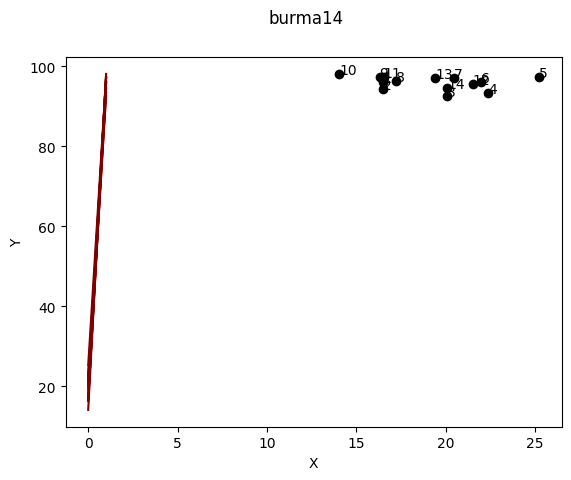

2023-11-30 15:41:46 INFO     ulysses16.tsp


KeyboardInterrupt: 

In [27]:
print("start")
for tsp_instance in get_tsp_files_available("TSP_Instances/", 20) :
    log.info(tsp_instance)
    find_solution(tsp_instance, ACO)


In [10]:
import numpy as np 
arr = np.array([False, True, False])
arr == False

array([ True, False,  True])

# Test


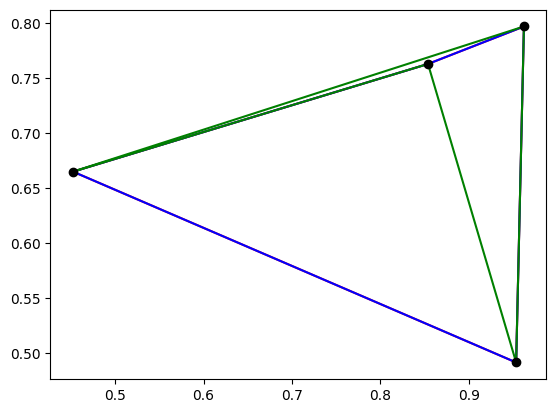

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
points = np.random.rand(4, 2)
colors = ['red', 'blue', 'green']
solutions = [[0, 1, 2, 3], [3, 2, 1, 0], [0, 2, 1, 3]]

# Create a figure and axis
fig, ax = plt.subplots()


# Scatter plot
ax.scatter(points[:, 0], points[:, 1], c='k', marker='o', zorder=2)

# Plot lines
for color, solution in zip(colors, solutions):
    for i in range(len(points) - 1):
        ax.plot(
            [points[solution[i], 0], points[solution[i + 1], 0]],
            [points[solution[i], 1], points[solution[i + 1], 1]],
            c=color, linestyle='-'
        )
    ax.plot(
        [points[solution[0], 0], points[solution[-1], 0]],
        [points[solution[0], 1], points[solution[-1], 1]],
        c=color, linestyle='-'
    )


# Show the plot
plt.show()


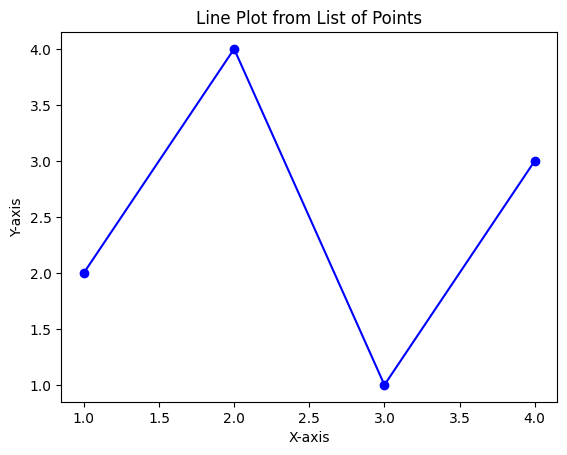

In [26]:
import matplotlib.pyplot as plt

# Example list of points
points = [(1, 2), (2, 4), (3, 1), (4, 3)]

# Extract x and y coordinates from the list of points
x_values, y_values = zip(*points)

# Plot the line
plt.plot(x_values, y_values, marker='o', linestyle='-', color='blue')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot from List of Points')

# Show the plot
plt.show()